In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("gpa_lin.csv")
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


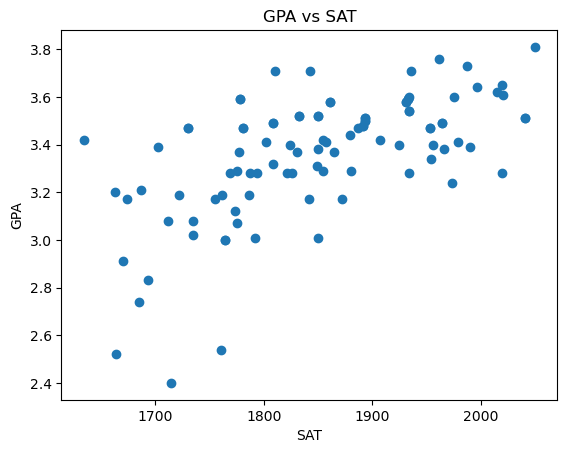

In [4]:
###scatter plot
plt.scatter(df["SAT"],df["GPA"])
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.title("GPA vs SAT")
plt.show()

In [5]:
### Correlation
df.corr()

,SAT,GPA
SAT,1.000000,0.612552
GPA,0.612552,1.000000


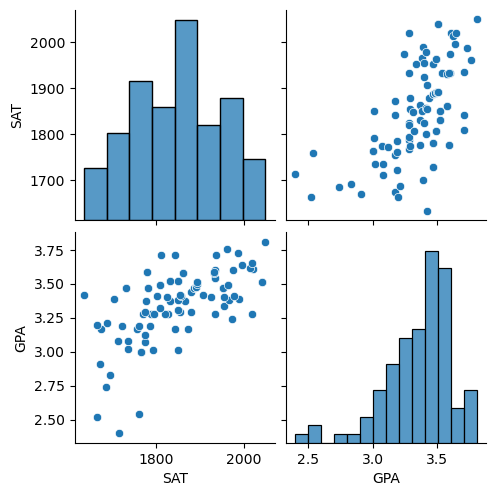

In [6]:
###For visualization
import seaborn as sns
sns.pairplot(df)
plt.show()

In [22]:
###independet features
X= df[["GPA"]]
y=df["SAT"]
X_series=df["GPA"]



In [23]:
np.array(y).shape


(100,)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=40)

In [25]:
X_train.shape

(75, 1)

In [26]:
###standadization
from sklearn.preprocessing import StandardScaler

In [27]:
scaler= StandardScaler() ### standardize only input not target value
X_train = scaler.fit_transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

In [29]:
### Apply ml
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)

In [30]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [31]:
print("Coeff or Slope: ", regression.coef_)
print("Intercept: ",regression.intercept_)

Coeff or Slope:  [58.83502183]
Intercept:  1842.6266666666668


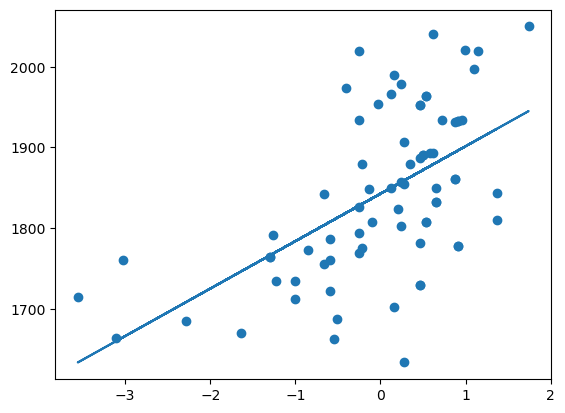

In [32]:
####plot Training dataa plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [33]:
####Prediction for test data
y_pred=regression.predict(X_test)

In [35]:
###performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [36]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mse: ",mse)
print("Mae: ",mae)
print("rmse: ",rmse)

Mse:  4596.295165293896
Mae:  54.33112684507377
rmse:  67.79598192587741


In [37]:
from sklearn.metrics import r2_score

In [38]:
score=r2_score(y_test,y_pred)
print(score)

0.4621331453166395
